# News Headline Topic Analysis Using Sentiment Analysis through Natural Language Toolkit (NLTK)

## What is Sentiment Analysis?  

Sentiment analysis is a Natural Language Processing (NLP) study of opinions, sentiments and emotions expressed in various forms of text. We can use Sentiment analysis to get an overall feel of a diner’s restaurant review, comments on an Instagram post, or in our case: news headlines. 

Sentiment Analysis models search for  words that might define the overall positivity/negativity of a text, like the words “good” , “bad” , “perfect” , “dismal”. NLTK uses this “bag of words” approach while also taking into account intensifier words like “really” or “very” when calculating a sentiment score. 


## Why Sentiment Analysis? 


Sentiment Analysis can be used to quickly assess the overall sentiment on a topic, which is very valuable for brands that want to assess overall customer satisfaction across a variety of platforms using thousands of text blobs. For us, using NLTK allowed us to score thousands of news headlines in minutes, giving each day a sentiment score that we were able to use with our stock market data. 

Credit : 

<a href="http://people.sabanciuniv.edu/berrin/proj102/1-BLiu-Sentiment%20Analysis%20and%20Subjectivity-NLPHandbook-2010.pdf">Sentiment Analysis and Subjectivity</a> by Bing Liu 

<a href= "https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c"> 
NLP: Pre-trained Sentiment Analysis</a> by Mohammed Terry-Jack


In [30]:
#import dependencies

import pandas as pd


import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import numpy as np
np.random.seed(22)


[nltk_data] Downloading package wordnet to /Users/jrevier/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
#read in test data
data = pd.read_csv("../Data/RedditNews.csv")



In [32]:
#preview data 
data.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [33]:
headlines = data[['News']]
headlines.head()

,News
0,A 117-year-old woman in Mexico City finally re...
1,IMF chief backs Athens as permanent Olympic host
2,"The president of France says if Brexit won, so..."
3,British Man Who Must Give Police 24 Hours' Not...
4,100+ Nobel laureates urge Greenpeace to stop o...


In [34]:
#loop through news articles and append them to a list
news = []
for headline in data["News"]:
    if (headline in news):
        continue
    else:
        news.append(headline)

In [6]:
#create lists for sentiment analysis
all_news = data['News']
all_sent_values = []
all_sentiments = []

## Using NLTK

We'll use the pretrained sentiment model VADER (Valence Aware Dictionary and sEntiment Reasoner) to analyze our dataset. Vader not only tells us if a text blob is negative or positive, but also how strongly the document is skewed. 

In [7]:
#import nltk sentiment analysis model 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

### Testing our model 

We chose a couple random data points from the dataset to see how the model scored the news topics. 

Output: 

Chinese Cops Are Temporarily Patrolling the Streets of Rome &amp; Milan - A new experimental program put international police at Italy's tourist hubs to help the influx of Chinese travelers
Sentiment: 
0.4

South Korea fires warning shots after boats from North cross sea border
Sentiment: 
-0.3

In [8]:
#test model on a couple news samples
sample = data['News'][1231]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

Chinese Cops Are Temporarily Patrolling the Streets of Rome &amp; Milan - A new experimental program put international police at Italy's tourist hubs to help the influx of Chinese travelers
Sentiment: 
0.4


In [9]:
sample1 = data['News'][876]
print(sample1)
print('Sentiment: ')
print(sentiment_value(sample1))

South Korea fires warning shots after boats from North cross sea border
Sentiment: 
-0.3


### Looping through the data and applying the VADER model

In [10]:
#loop through news list and apply sentiment model
for i in range(len(data['News'])):
    all_sent_values.append(sentiment_value(all_news[i]))

In [12]:
#assign numeric values to sentiment scores
Sentiment_Value = []
Sentiment = []
for i in range(len(data['News'])):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        Sentiment.append('V.Positive')
        Sentiment_Value.append(5)
    elif (sent<0.5 and sent>0):
        Sentiment.append('Positive')
        Sentiment_Value.append(4)
    elif (sent==0):
        Sentiment.append('Neutral')
        Sentiment_Value.append(3)
    elif (sent<0 and sent>=-0.5):
        Sentiment.append('Negative')
        Sentiment_Value.append(2)
    else:
        Sentiment.append('V.Negative')
        Sentiment_Value.append(1)

In [13]:
#create columns 
data['Sentiment_Value'] = Sentiment_Value
data['Sentiment'] = Sentiment

In [35]:
#preview data
data.head(20)

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...
5,2016-07-01,Brazil: Huge spike in number of police killing...
6,2016-07-01,Austria's highest court annuls presidential el...
7,2016-07-01,"Facebook wins privacy case, can track any Belg..."
8,2016-07-01,Switzerland denies Muslim girls citizenship af...
9,2016-07-01,China kills millions of innocent meditators fo...


## Loading in our Full Dataset

Once we tested the model on the simpler dataset, we imported our full dataset and looped through the Top 25 News Topics for each day. 

In [15]:
#read in full table
all_data = pd.read_csv('../Data/Combined_News_DJIA.csv')
all_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [16]:
#drop na values
all_data.dropna(how='any', inplace=True)

In [17]:
# Loop through the columns containing headlines and apply `sentiment_value` to each headline, to retrieve sentiment score
# Assign that data to a new column

for x in range(1,26): # for each column
    col = "Top" + str(x)
    new_col = col + " sentiment_value"
    
    # for each row in column
    # get the headline, feed it into the nltk model and score
    all_data[new_col] = all_data[col].apply(sentiment_value)

In [18]:
#preview complete data
all_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16 sentiment_value,Top17 sentiment_value,Top18 sentiment_value,Top19 sentiment_value,Top20 sentiment_value,Top21 sentiment_value,Top22 sentiment_value,Top23 sentiment_value,Top24 sentiment_value,Top25 sentiment_value
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,0.0,0.0,0.2,0.2,0.0,-0.8,-0.6,-0.3,-0.9,0.4
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,0.0,0.0,-0.7,0.0,0.0,-0.8,0.0,-0.3,-0.2,0.0
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,0.0,0.0,0.1,-0.6,-0.6,0.0,0.5,0.4,0.0,0.0
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,0.0,0.0,0.0,-0.5,-0.0,-0.3,0.5,-0.6,-0.4,-0.3
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,-0.6,0.0,0.0,0.0,0.0,-0.4,-0.6,0.2,-0.7,0.7


In [19]:
#average all scores for each day into a Daily Sentiment column
all_data["Daily_Sentiment"] =all_data.mean(axis=1)


In [20]:
#round values
sentiment_df = all_data.round(2)
sentiment_df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17 sentiment_value,Top18 sentiment_value,Top19 sentiment_value,Top20 sentiment_value,Top21 sentiment_value,Top22 sentiment_value,Top23 sentiment_value,Top24 sentiment_value,Top25 sentiment_value,Daily_Sentiment
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,0.0,0.2,0.2,0.0,-0.8,-0.6,-0.3,-0.9,0.4,-0.30
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,0.0,-0.7,0.0,0.0,-0.8,0.0,-0.3,-0.2,0.0,-0.08
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,0.0,0.1,-0.6,-0.6,0.0,0.5,0.4,0.0,0.0,-0.22
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,0.0,0.0,-0.5,-0.0,-0.3,0.5,-0.6,-0.4,-0.3,-0.15
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,0.0,0.0,0.0,0.0,-0.4,-0.6,0.2,-0.7,0.7,-0.08


In [21]:
#find min/max of our dataset
print('Maximum sentiment score: ')  
print(sentiment_df["Daily_Sentiment"].max())
print('Minimum sentiment score: ')
print(sentiment_df["Daily_Sentiment"].min())

Maximum sentiment score: 
0.13
Minimum sentiment score: 
-0.5


In [22]:
#import matplotlib for distribution analysis
import matplotlib.pyplot as plt
from scipy.stats import sem


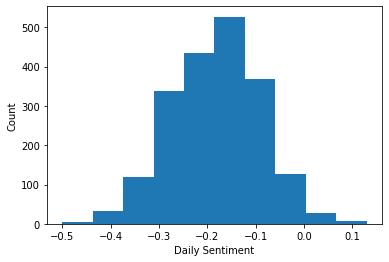

In [23]:
#plot histogram of Daily sentiment values 
plt.hist(sentiment_df.Daily_Sentiment)
plt.xlabel("Daily Sentiment")
plt.ylabel("Count")
plt.show()

In [54]:
#grouping data by year to observe if there are any trends in sentiment scores. 
import datetime

sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'], format="%Y-%m-%d")
sentiment_df['Year'] = sentiment_df['Date'].dt.month

sentiment_by_year = sentiment_df.groupby('Year').mean()
sentiment_by_year=sentiment_by_year.reset_index(drop = False) 
sentiment_by_year.head()

,Year,Label,Top1 sentiment_value,Top2 sentiment_value,Top3 sentiment_value,Top4 sentiment_value,Top5 sentiment_value,Top6 sentiment_value,Top7 sentiment_value,Top8 sentiment_value,...,Top18 sentiment_value,Top19 sentiment_value,Top20 sentiment_value,Top21 sentiment_value,Top22 sentiment_value,Top23 sentiment_value,Top24 sentiment_value,Top25 sentiment_value,Daily_Sentiment,Month
0,2008,0.465347,-0.206931,-0.187129,-0.219802,-0.213861,-0.289109,-0.141584,-0.239604,-0.212871,...,-0.204950,-0.184158,-0.241584,-0.151485,-0.181188,-0.234653,-0.156436,-0.183168,-0.173663,10.099010
1,2009,0.536000,-0.207200,-0.223600,-0.215600,-0.228400,-0.247600,-0.214400,-0.256000,-0.245600,...,-0.183200,-0.183600,-0.167200,-0.197600,-0.167600,-0.241600,-0.209200,-0.176400,-0.181840,6.536000
2,2010,0.567460,-0.159921,-0.244048,-0.211508,-0.225794,-0.213492,-0.167460,-0.218651,-0.222222,...,-0.200794,-0.176984,-0.210714,-0.225794,-0.210317,-0.266667,-0.171429,-0.234921,-0.184444,6.583333
3,2011,0.549801,-0.196414,-0.222311,-0.202390,-0.211554,-0.231076,-0.184064,-0.197610,-0.251793,...,-0.194024,-0.252191,-0.213147,-0.253785,-0.227092,-0.207171,-0.233068,-0.217928,-0.191195,6.557769
4,2012,0.492000,-0.197600,-0.284400,-0.226000,-0.221200,-0.222000,-0.246400,-0.277600,-0.247600,...,-0.231200,-0.221200,-0.282400,-0.265600,-0.262000,-0.228800,-0.240800,-0.264400,-0.214440,6.500000


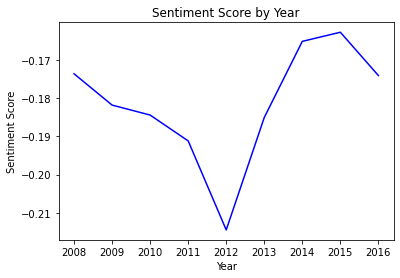

In [55]:
#looking at sentiment scores by year
plt.plot(sentiment_by_year['Year'], sentiment_by_year['Daily_Sentiment'], color="blue")
plt.xlabel("Year")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Score by Year")
plt.show()

In [ ]:
#save sentiment scores in a csv file 
sentiment_df.to_csv("../Data/sentiment_values.csv")

## Flair Sentiment Model 

Flair is an additional NLP and sentiment analysis tool that uses a character-level Long-Short Term Memory (LSTM) neural network. LSTMs which takes the sequence of words into account, which might be preferable to NLTK's bag of words approach. Flair has also learned to account for negations like ("I love dogs") vs. ("I do not love dogs"). Flair can also predict typos which is a huge advantage in analysing social media text. 

In [ ]:
#importing flair and the sentiment model
import flair


def flair_sentiment(Paragraph): 
    analyser = flair.models.TextClassifier.load('sentiment-fast')
    p = flair.data.Sentence(Paragraph)
    result = analyser.predict(p)
    score = p.labels
    return score

all_flair_sent_values = []

## Testing Flair against NLTK 

NLTK Output: 
Chinese Cops Are Temporarily Patrolling the Streets of Rome & Milan - A new experimental program put international police at Italy's tourist hubs to help the influx of Chinese travelers 
- Sentiment: 0.4 (Positive)

South Korea fires warning shots after boats from North cross sea border 
- Sentiment: -0.3 (Negative)

Flair Output: 

Chinese Cops Are Temporarily Patrolling the Streets of Rome &amp; Milan - A new experimental program put international police at Italy's tourist hubs to help the influx of Chinese travelers
- Sentiment: 
[NEGATIVE (0.9173)]

South Korea fires warning shots after boats from North cross sea border
- Sentiment: 
[NEGATIVE (0.6645)]

In [30]:
sample = data['News'][1231]
print(sample)
print('Sentiment: ')
print(flair_sentiment(sample))

Chinese Cops Are Temporarily Patrolling the Streets of Rome &amp; Milan - A new experimental program put international police at Italy's tourist hubs to help the influx of Chinese travelers
Sentiment: 
2020-05-20 20:23:38,957 loading file /Users/jrevier/.flair/models/sentiment-en-mix-ft-rnn.pt
[NEGATIVE (0.9173)]


../torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [31]:
sample1 = data['News'][876]
print(sample1)
print('Sentiment: ')
print(flair_sentiment(sample1))

South Korea fires warning shots after boats from North cross sea border
Sentiment: 
2020-05-20 20:23:52,278 loading file /Users/jrevier/.flair/models/sentiment-en-mix-ft-rnn.pt
[NEGATIVE (0.6645)]
